In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Check for missing values
missing_values = X.isnull().sum()

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Missing Values:\n{missing_values}")

Missing Values:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print results
print("Model Performance:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")

Model Performance:
Logistic Regression: 0.9825
Decision Tree: 0.9298
Random Forest: 0.9649
SVM: 0.9708
k-NN: 0.9591


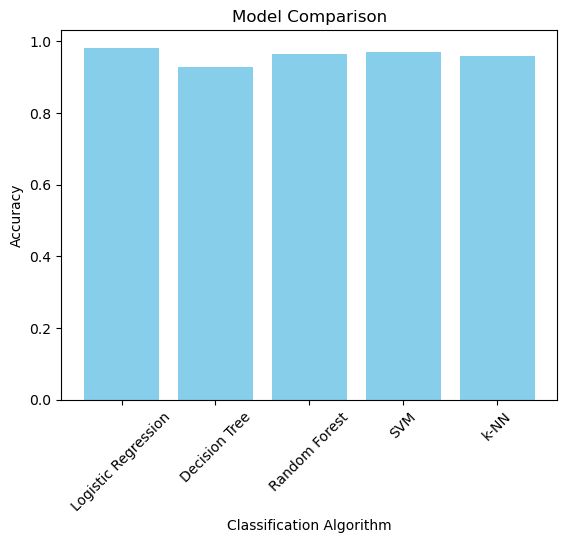

Best Model: Logistic Regression with accuracy 0.9825
Worst Model: Decision Tree with accuracy 0.9298


In [5]:
import matplotlib.pyplot as plt

# Plot the performance
plt.bar(results.keys(), results.values(), color='skyblue')
plt.xlabel("Classification Algorithm")
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.xticks(rotation=45)
plt.show()

# Identify best and worst performers
best_model = max(results, key=results.get)
worst_model = min(results, key=results.get)

print(f"Best Model: {best_model} with accuracy {results[best_model]:.4f}")
print(f"Worst Model: {worst_model} with accuracy {results[worst_model]:.4f}")